In [3]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 23.4 MB/s eta 0:00:00


In [42]:
# @title Criação de Função de Apoio

# Função para realizar testes de normalidade
def test_normality(data, column_name):
    shapiro_test = shapiro(data[column_name])
    kstest_test = kstest(data[column_name], 'norm', args=(data[column_name].mean(), data[column_name].std()))

    print(f'Testes de Normalidade para {column_name}:')
    print(f'Shapiro-Wilk Test: W={shapiro_test[0]}, p-value={shapiro_test[1]}')
    print(f'Kolmogorov-Smirnov Test: D={kstest_test[0]}, p-value={kstest_test[1]}')
    print('\n')

In [41]:
# @title Importando as bibliotecas necessarias

import pandas as pd
import numpy as np
#import sweetviz as sv # Se quiser gerar um relatorio html com EDA, descomente está linha
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest

In [13]:
# @title Carregando os dados do Dataset

financial_data = pd.read_csv("/content/Financial_Dataset.csv")

In [14]:
financial_data.head()

,Revenue,Expenses,Profit,Assets,Liabilities,Equity
0,131958,130885,12356,5249534,4094630,966011
1,681155,376921,104451,3414344,4175279,3667905
2,141932,22368,178600,149976,4841882,4035129
3,375838,151400,455655,2622620,4379454,3771509
4,269178,193014,-45376,2127320,1045893,802955


In [ ]:
''' Para utilizar o relatorio automatico de EDA descomente este bloco e a importação da biblioteca Sweetviz

# Analisar e comparar todo o conjunto de dados
analise = sv.analyze(financial_data)

# Mostrar o relatório
analise.show_html("relatorio_sweetviz.html")

'''

In [16]:
# @title 1 - Checar valores nulos
null_check = financial_data.isnull().sum()
print("Valores Nulos por Coluna:")
print(null_check)

Valores Nulos por Coluna:
Revenue        0
Expenses       0
Profit         0
Assets         0
Liabilities    0
Equity         0
dtype: int64


In [17]:
# @title 2 - Checar valores vazios (no caso de strings vazias)
empty_check = (financial_data == '').sum()
print("\nValores Vazios por Coluna:")
print(empty_check)


Valores Vazios por Coluna:
Revenue        0
Expenses       0
Profit         0
Assets         0
Liabilities    0
Equity         0
dtype: int64


In [15]:
# @title 3 - Analise Descritiva Inicial
financial_data.describe()

,Revenue,Expenses,Profit,Assets,Liabilities,Equity
count,1500.000000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03
mean,492621.070000,253771.866000,203712.648000,5.004163e+06,2.500525e+06,2.531521e+06
std,288354.575116,140901.462088,173720.052028,2.828888e+06,1.415927e+06,1.428899e+06
min,10404.000000,5126.000000,-99841.000000,1.009170e+05,5.021500e+04,1.328500e+04
25%,233801.750000,136205.500000,51017.250000,2.523785e+06,1.283810e+06,1.339686e+06
50%,486781.000000,250723.000000,195987.500000,5.044604e+06,2.468351e+06,2.491964e+06
75%,739713.250000,378155.750000,357428.750000,7.333996e+06,3.747797e+06,3.808809e+06
max,999913.000000,499937.000000,499253.000000,9.971403e+06,4.998122e+06,4.996145e+06


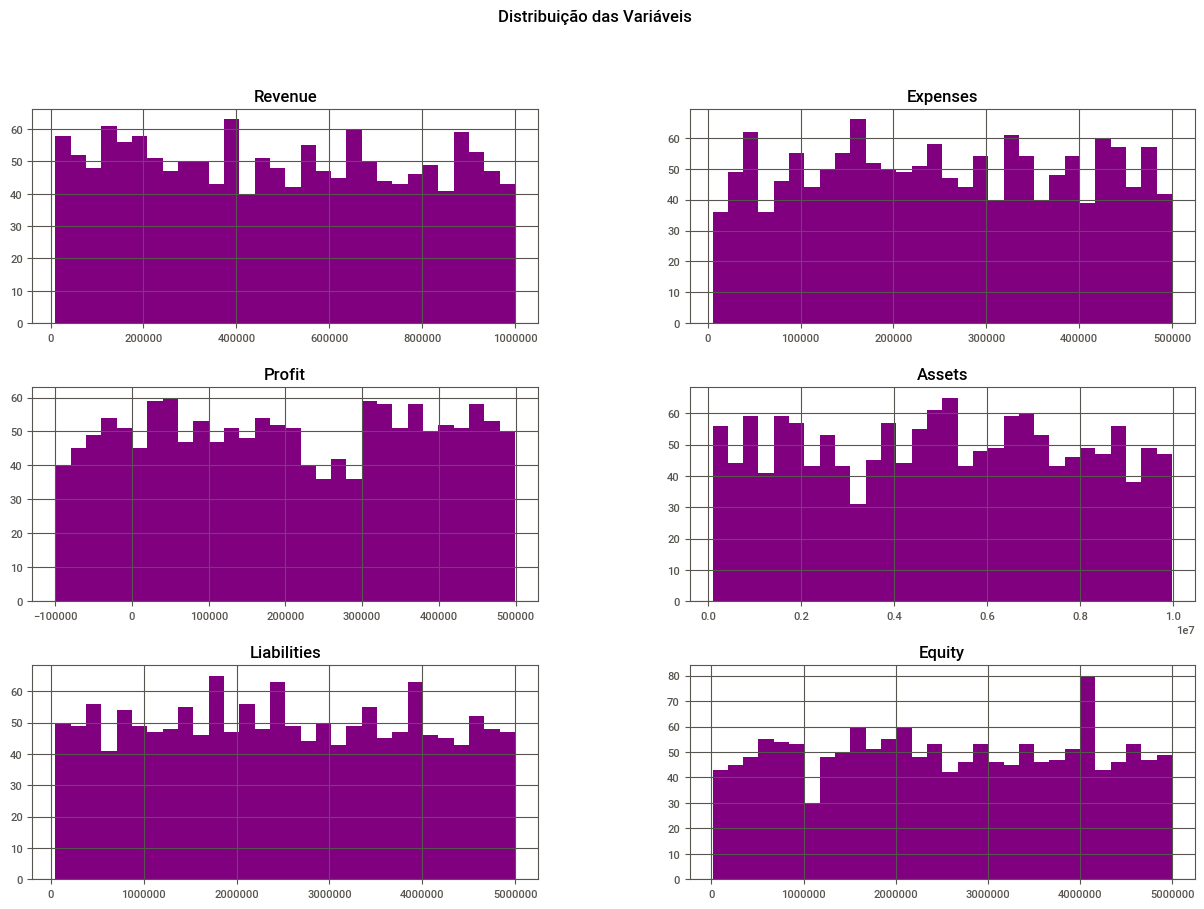

######################################################################### Separador #########################################################################


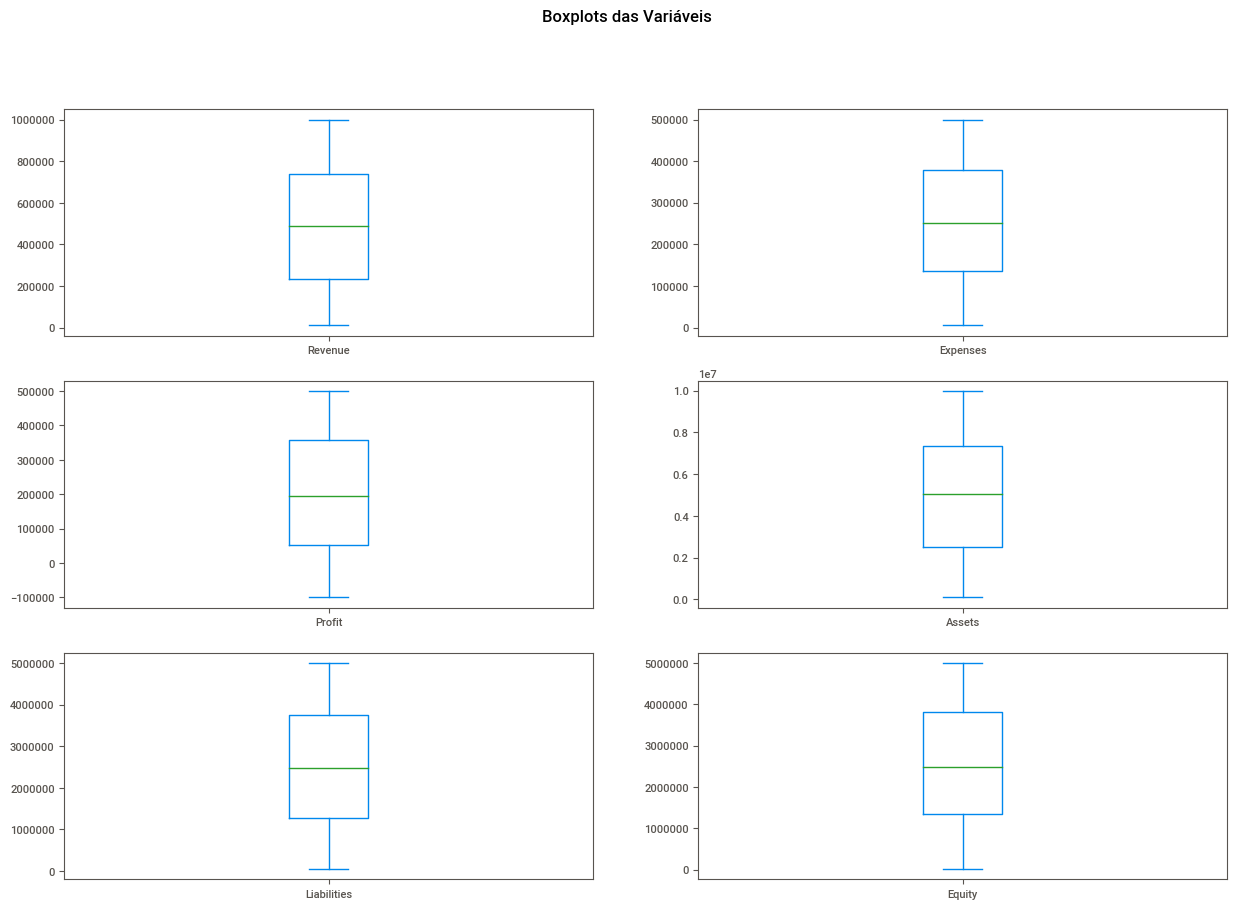

In [37]:
# @title 4 - Visualização de Distribuição

# Histograma para cada coluna
financial_data.hist(bins=30, figsize=(15, 10), color = "purple")
plt.suptitle('Distribuição das Variáveis')
plt.show()

print(" Separador ".center(157,"#"))

# Boxplot para cada coluna
financial_data.plot(kind='box', subplots=True, layout=(3, 2), figsize=(15, 10), title='Boxplots das Variáveis')
plt.show()

In [44]:
# @title Teste de normalidade dos dados

# hipótese nula é que os dados possuem a distribuição normal

# Vamos percorrer as colunas com laço for utilizando a função de apoio, criada no inicio deste notebook
# Aplicar a função a cada coluna
for column in financial_data.columns:
    test_normality(financial_data, column)

Testes de Normalidade para Revenue:
Shapiro-Wilk Test: W=0.9514817595481873, p-value=7.220194711659616e-22
Kolmogorov-Smirnov Test: D=0.06846831164262751, p-value=1.471996544879126e-06


Testes de Normalidade para Expenses:
Shapiro-Wilk Test: W=0.9565728902816772, p-value=1.0231270980871956e-20
Kolmogorov-Smirnov Test: D=0.06271531638474437, p-value=1.4276037461586405e-05


Testes de Normalidade para Profit:
Shapiro-Wilk Test: W=0.9498746991157532, p-value=3.2639669000709397e-22
Kolmogorov-Smirnov Test: D=0.07478182186037041, p-value=9.66496270486755e-08


Testes de Normalidade para Assets:
Shapiro-Wilk Test: W=0.9571661353111267, p-value=1.4140319760644426e-20
Kolmogorov-Smirnov Test: D=0.06618249074626975, p-value=3.71821182770732e-06


Testes de Normalidade para Liabilities:
Shapiro-Wilk Test: W=0.9565074443817139, p-value=9.874681819853442e-21
Kolmogorov-Smirnov Test: D=0.06137753933325285, p-value=2.3530182926647523e-05


Testes de Normalidade para Equity:
Shapiro-Wilk Test: W=0.9

## Interpretação dos Resultados

Os p-valores de todos os testes Shapiro-Wilk e Kolmogorov-Smirnov para todas as variáveis são extremamente baixos (menores que 0.05). Isso indica que devemos rejeitar a hipótese nula de que os dados seguem uma distribuição normal. Portanto, podemos concluir que os dados são não parámetricos.

## Implicações:

Métodos Estatísticos: Para análises futuras, deve-se utilizar métodos estatísticos não paramétricos, que não assumem uma distribuição normal dos dados.

Modelos de Previsão: Se você pretende construir modelos de previsão, pode ser necessário transformar os dados ou escolher modelos que não assumam normalidade dos dados.

              Revenue  Expenses    Profit    Assets  Liabilities    Equity
Revenue      1.000000  0.027317 -0.025184 -0.033522     0.017652 -0.018107
Expenses     0.027317  1.000000 -0.019597 -0.010040    -0.025536  0.027327
Profit      -0.025184 -0.019597  1.000000  0.004530    -0.041787  0.024009
Assets      -0.033522 -0.010040  0.004530  1.000000    -0.003054 -0.027342
Liabilities  0.017652 -0.025536 -0.041787 -0.003054     1.000000 -0.017034
Equity      -0.018107  0.027327  0.024009 -0.027342    -0.017034  1.000000


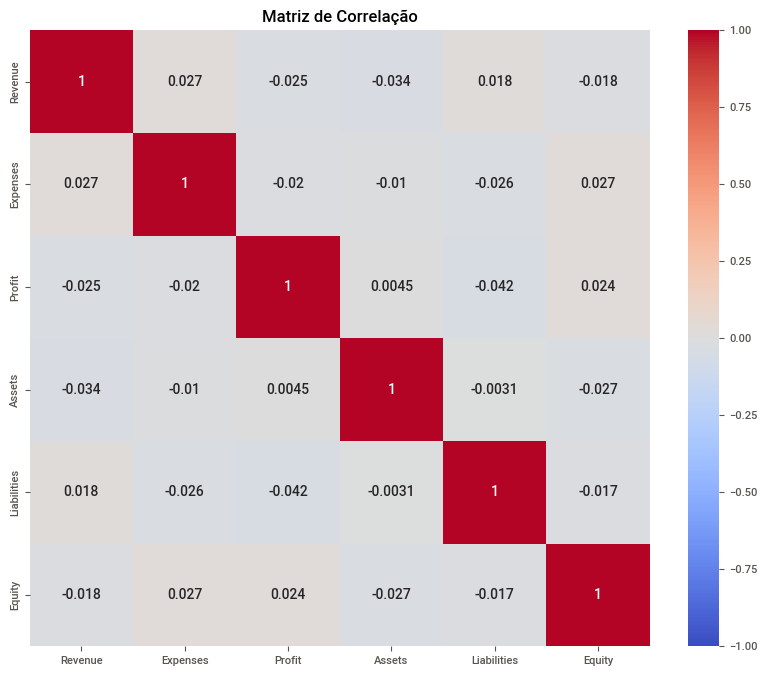

In [45]:
# @title 5 - Correlação entre Variáveis
# Buscando na literatura foi possivel entender que a correlação de Spearman se aplica a dados não parámetricos

correlation_matrix = financial_data.corr(method='spearman')
print(correlation_matrix)

# Heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Conclusões da Matriz de Correlação (Spearman)

A matriz de correlação de Spearman fornece informações sobre a força e a direção das relações monotônicas entre as variáveis do nosso dataset. Aqui estão alguns pontos importantes:



1.   **Receita (Revenue):**
  *   Tem uma correlação muito baixa e praticamente nula com todas as outras variáveis.
  *   A correlação mais forte é com Despesas (Expenses), mas ainda assim é muito fraca (0.027).



2.   **Despesas (Expenses):**
  *   Correlações muito fracas com todas as outras variáveis.
  *   Maior correlação com Receita (Revenue) e Patrimônio Líquido (Equity) (~0.027).


3.   **Lucro (Profit):**
  *   Tem correlações muito fracas com todas as variáveis.
  *   Correlação negativa mais forte com Passivos (Liabilities) (-0.042)

4.   **Ativos (Assets):**
  *   TCorrelações praticamente nulas com todas as variáveis.

5.   **Passivos (Liabilities):**
  *   Correlações muito fracas com todas as variáveis.
  *   Correlação negativa mais forte com Lucro (Profit) (-0.042).

6.   **Patrimônio Líquido (Equity):**
  *   Correlações muito fracas com todas as variáveis.



Pode ser necessário realizar análises adicionais ou considerar outras variáveis para entender melhor as relações no dataset.